<a href="https://colab.research.google.com/github/monroews/About/blob/master/TE_Filter_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TE Filter Model

Corrected to eliminate artificial dependencies on London Van der Waals forces that were created by including those forces in multiple dimensionless groups that canceled out.

Tufenkji, N. and M. Elimelech (2004). "Correlation equation for predicting single-collector efficiency in physicochemical filtration in saturated porous media." Environmental-Science-and-Technology 38(2): 529-536.

# Model Inputs

In [3]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.8MB/s 
     |████████████████████████████████| 163kB 8.1MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=134259319734a97239bf4ad94488d50d7520141fc9212c9afc8d8472b31faf10
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=f502ebb510a25febec26fc14336036279965c6142c99ed120230a5bb8ac04350
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.1MB/s 


In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
n = 50
d_p = np.logspace(-1,2,n) * u.um 
rho_p = 2650 * u.kg/u.m**3
v_a = 1.8 * u.mm/u.s
temp = 20 * u.degC 
z = 20 * u.cm
d_c = 0.5 * u.mm
alpha = 1
porosity = 0.4

# Dimensionless groups

In [0]:
def Pi_R(d_c,d_p):
  return (d_p/d_c).to(u.dimensionless)

def Pi_z(d_c,z,porosity):
  return (z/d_c * 3 * (1-porosity)/2/np.log(10)).to(u.dimensionless)

def Pi_Br(d_c,d_p,v_a,temp):
  return (u.boltzmann_constant*temp/(3*np.pi*ac.viscosity_dynamic_water(temp)*d_p*v_a*d_c)).to(u.dimensionless)

def Pi_g(d_c,d_p,v_a,temp,rho_p):
  return d_p**2 *(rho_p-ac.density_water(temp))*u.gravity/(18*ac.viscosity_dynamic_water(temp)*v_a)

def Re_p(d_c,v_a,temp):
  return (v_a * d_c/ac.viscosity_kinematic_water(temp)).to(u.dimensionless)

def A_s(porosity):
  x = (1-porosity)**(1/3)
  return 2 * (1-x**5)/(2-3*x + 3*x**5 - 2*x**6)

#Transport due to Brownian motion, gravity, and interception

def T_Br(d_c,d_p,v_a,temp,porosity):
  return 3/4 * A_s(porosity)**(1/3) * Pi_R(d_c,d_p)**(-1/6) * Pi_Br(d_c,d_p,v_a,temp)**(2/3)

def T_In(d_c,d_p,porosity):
  return 1/21.5 * A_s(porosity) * Pi_R(d_c,d_p)**1.425

def T_g(d_c,d_p,v_a,temp,rho_p):
  return 0.31 * Pi_g(d_c,d_p,v_a,temp,rho_p)

def pC_Br(d_c,d_p,v_a,temp,porosity,alpha):
  return Pi_z(d_c,z,porosity) * alpha * T_Br(d_c,d_p,v_a,temp,porosity)

def pC_In(d_c,d_p,z,porosity,alpha):
  return Pi_z(d_c,z,porosity) * alpha * T_In(d_c,d_p,porosity)

def pC_g(d_c,d_p,v_a,temp,rho_p):
  return Pi_z(d_c,z,porosity) * alpha * T_g(d_c,d_p,v_a,temp,rho_p)

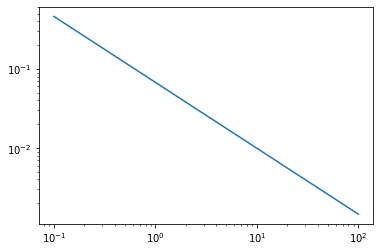

In [21]:

y0 = np.empty(n)
for i in range(n):
  y0[i]=pC_Br(d_c,d_p[i],v_a,temp,porosity,alpha)

plt.plot(d_p,y0)
plt.xscale("log")
plt.yscale("log")